In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"D:\GITHUB\credit-card-fraud-detection\data\raw\creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


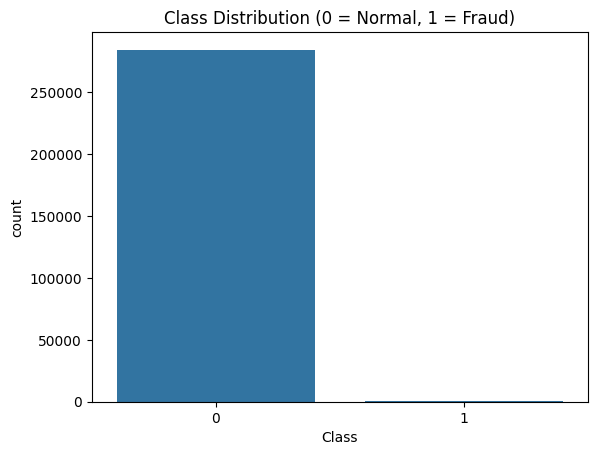

In [4]:
df["Class"].value_counts()

sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()


In [5]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [9]:
import os

os.makedirs("../data/processed", exist_ok=True)

pd.DataFrame(X_train_smote).to_csv(
    "../data/processed/X_train_smote.csv", index=False
)
pd.Series(y_train_smote).to_csv(
    "../data/processed/y_train_smote.csv", index=False
)

print("Processed data saved ✔")


Processed data saved ✔


In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train_smote, y_train_smote)


KeyboardInterrupt: 

In [ ]:
import joblib

os.makedirs("../models", exist_ok=True)

joblib.dump(lr, "../models/logistic_regression.pkl")
joblib.dump(rf, "../models/random_forest.pkl")

print("Models saved ✔")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score

y_pred_lr = lr.predict(X_test)

print("Recall:", recall_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


In [ ]:
y_pred_rf = rf.predict(X_test)

print("Recall:", recall_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


In [ ]:
os.makedirs("../reports", exist_ok=True)

# Save classification reports
with open("../reports/logistic_regression_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_lr))

with open("../reports/random_forest_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_rf))


In [ ]:
def save_confusion_matrix(y_true, y_pred, name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(name)
    plt.savefig(f"../reports/{name}.png")
    plt.close()

save_confusion_matrix(y_test, y_pred_lr, "logistic_regression_cm")
save_confusion_matrix(y_test, y_pred_rf, "random_forest_cm")

print("Reports saved ✔")
